# Coronavirus predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('./full_data.csv')

In [3]:
df.tail()

,date,location,new_cases,new_deaths,total_cases,total_deaths
19600,2020-05-22,Zimbabwe,3,0,51,4
19601,2020-05-23,Zimbabwe,5,0,56,4
19602,2020-05-24,Zimbabwe,0,0,56,4
19603,2020-05-25,Zimbabwe,0,0,56,4
19604,2020-05-26,Zimbabwe,0,0,56,4


## We  want to focus on the data  providing the pandemic evolution

In [4]:
df=df[df['location']=='World']
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
19274,2019-12-31,World,27,0,27,0
19275,2020-01-01,World,0,0,27,0
19276,2020-01-02,World,0,0,27,0
19277,2020-01-03,World,17,0,44,0
19278,2020-01-04,World,0,0,44,0
...,...,...,...,...,...,...
19417,2020-05-22,World,107909,5442,5069366,333399
19418,2020-05-23,World,106559,4690,5175925,338089
19419,2020-05-24,World,101131,3989,5277056,342078
19420,2020-05-25,World,94231,816,5371287,342894


### We would also would like to filter the data where the number of cases was zero and change the index

In [5]:
df=df[df['total_cases']>0]
df = df.reset_index(drop=True)


In [6]:
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,World,27,0,27,0
1,2020-01-01,World,0,0,27,0
2,2020-01-02,World,0,0,27,0
3,2020-01-03,World,17,0,44,0
4,2020-01-04,World,0,0,44,0
...,...,...,...,...,...,...
143,2020-05-22,World,107909,5442,5069366,333399
144,2020-05-23,World,106559,4690,5175925,338089
145,2020-05-24,World,101131,3989,5277056,342078
146,2020-05-25,World,94231,816,5371287,342894


### Displaying and analyzing infection data

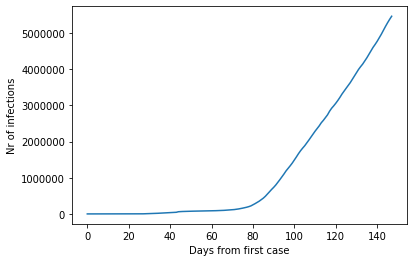

In [7]:
#How the number of infections evolved
plt.plot(df.index.values,df['total_cases'])
plt.ylabel('Nr of infections')
plt.xlabel('Days from first case')
plt.show()

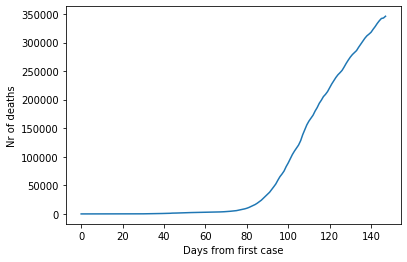

In [8]:
#How the number of deaths evolved
plt.plot(df.index.values,df['total_deaths'])
plt.ylabel('Nr of deaths')
plt.xlabel('Days from first case')
plt.show()

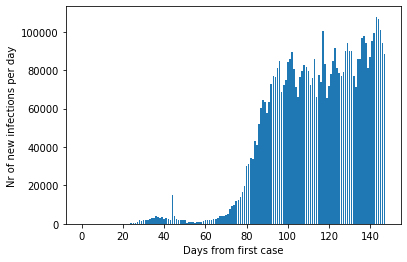

In [9]:
#for ploting the number of new cases, we will use a bar plot, as it can more easily go down
plt.bar(df.index.values,df['new_cases'])
plt.ylabel('Nr of new infections per day')
plt.xlabel('Days from first case')
plt.show()

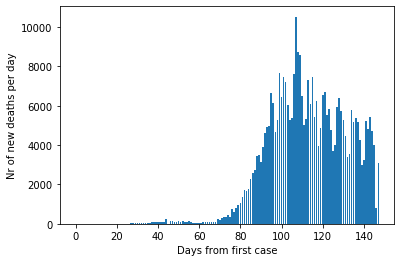

In [10]:
#for ploting the number of new deaths, we will use a bar plot, as it can more easily go down
plt.bar(df.index.values,df['new_deaths'])
plt.ylabel('Nr of new deaths per day')
plt.xlabel('Days from first case')
plt.show()

### Now, we would like to build a model that would predict the evolution of the disease

In [11]:
#choose the function
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR


#select the data
x=df.index.values.tolist()
y=df['total_cases']
x = np.array(x) 
x=x.reshape(-1,1)
model=SVR(shrinking=True, kernel='poly',degree=5)




x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.25,shuffle=False)


In [12]:
model.fit(x,y)
y_predict=model.predict(x_test)
print(r2_score(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.1526374061375405
711387085230.688


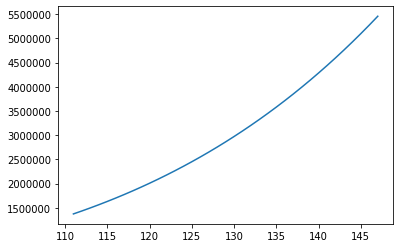

In [13]:
plt.plot(x_test,y_predict)

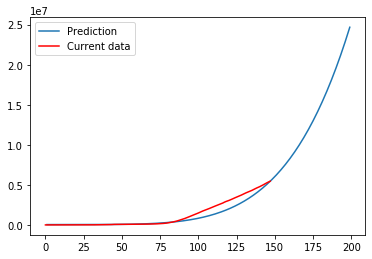

In [14]:
test_arr=np.arange(1,200).reshape(-1,1)
pred_arr=model.predict(test_arr)
plt.plot(test_arr,pred_arr,label="Prediction")
plt.plot(df.index.values.tolist(),y,'r', label="Current data")
plt.legend(loc="upper left")
plt.show()

In [15]:
minim=''
best=0
for d in range(2,10):
    model=SVR(shrinking=True, kernel='poly',degree=d)
    model.fit(x,y)
    y_predict=model.predict(x_test)
    r2=r2_score(y_test,y_predict)
    s2=mean_squared_error(y_test,y_predict)
    print('For degree: ' +str(d))
    print(r2)
    print(s2)
    if minim=='' or s2<minim:
        minim=s2
        best=d

print('Best degree: '+str(best))

For degree: 2
-16.259185812263592
14489619883355.332
For degree: 3
-15.996492939077289
14269081097810.105
For degree: 4
-13.47565807474103
12152762322970.314
For degree: 5
0.1526374061375405
711387085230.688
For degree: 6
0.19627758412250218
674749807115.5894
For degree: 7
-0.31459740876345843
1103645152200.1548
For degree: 8
-0.8488635984818542
1552178129928.8916
For degree: 9
-1.3991052331384517
2014122987403.2852
Best degree: 6


#### The degree with the best results in the given range would be 6


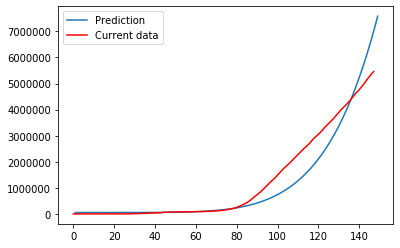

In [16]:
model=SVR(shrinking=True, kernel='poly',degree=6)
model.fit(x,y)

test_arr=np.arange(1,150).reshape(-1,1)
pred_arr=model.predict(test_arr)
plt.plot(test_arr,pred_arr,label="Prediction")
plt.plot(df.index.values.tolist(),y,'r', label="Current data")
plt.legend(loc="upper left")
plt.show()

In [17]:
df1=df[80:]

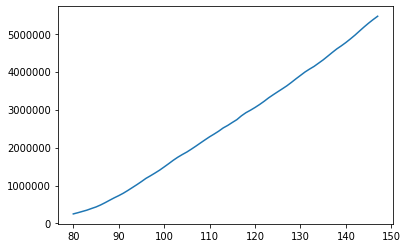

In [18]:
plt.plot(df1.index.values,df1['total_cases'])

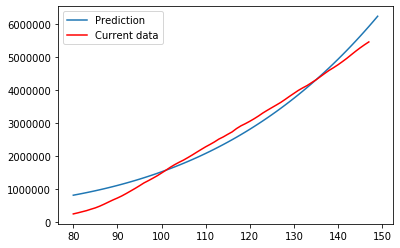

In [19]:
x1=np.array(df1.index.values.tolist()).reshape(-1,1)
y1=df1['total_cases']
model1=SVR(shrinking=True, kernel='poly',degree=4)
model1.fit(x1,y1)
y_predict=model1.predict(np.arange(80,150).reshape(-1,1))
plt.plot(np.arange(80,150).reshape(-1,1),y_predict,label="Prediction")
plt.plot(df1.index.values.tolist(),y1,'r', label="Current data")
plt.legend(loc="upper left")
plt.show()

In [20]:
minim=''
best=0
for d in range(2,7):
    model1=SVR(shrinking=True, kernel='poly',degree=d)
    model1.fit(x1,y1)
    y_predict=model1.predict(x1)
    r2=r2_score(y_predict,y1)
    s2=mean_squared_error(y_predict,y1)
    print('For degree: ' +str(d))
    print(r2)
    print(s2)
    if minim=='' or s2<minim:
        minim=s2
        best=d

print('Best degree: '+str(best))

For degree: 2
-38586.144471955035
2408917578582.9453
For degree: 3
-1.3295997088130789
893715395081.2692
For degree: 4
0.9653409324956995
76575093556.66203
For degree: 5
0.9377851774300936
139673819433.47235
For degree: 6
0.8984657179460845
219466540563.59726
Best degree: 4


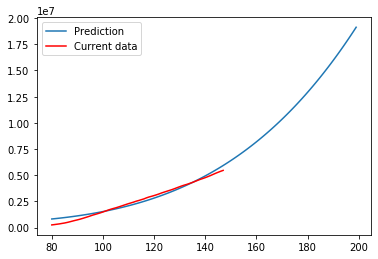

In [21]:
x1=np.array(df1.index.values.tolist()).reshape(-1,1)
y1=df1['total_cases']
model1=SVR(shrinking=True, kernel='poly',degree=4)
model1.fit(x1,y1)
y_predict=model1.predict(np.arange(80,200).reshape(-1,1))
plt.plot(np.arange(80,200).reshape(-1,1),y_predict,label="Prediction")
plt.plot(df1.index.values.tolist(),y1,'r', label="Current data")
plt.legend(loc="upper left")
plt.show()